In [1]:
from modelling.pre_process import pre_processing
import pandas as pd
import sweetviz as sv
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import locale
locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8") 
from matplotlib.dates import DateFormatter
formato = DateFormatter('%b, %Y')

# plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.formatter.use_locale'] = True

In [15]:
zip_file = ZipFile('Dados/cenario1.zip')
d = ['cenario1/amostra_972.csv',
     'cenario1/amostra_168.csv',
     'cenario1/amostra_636.csv',
     'cenario1/amostra_240.csv',
     'cenario1/amostra_888.csv',
     'cenario1/amostra_871.csv']

dados = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
#        if text_file.filename.endswith('.csv')}
        if text_file.filename in d}

AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)
AxesSubplot(0.125,0.125;0.227941x0.343182)
AxesSubplot(0.398529,0.125;0.227941x0.343182)
AxesSubplot(0.672059,0.125;0.227941x0.343182)


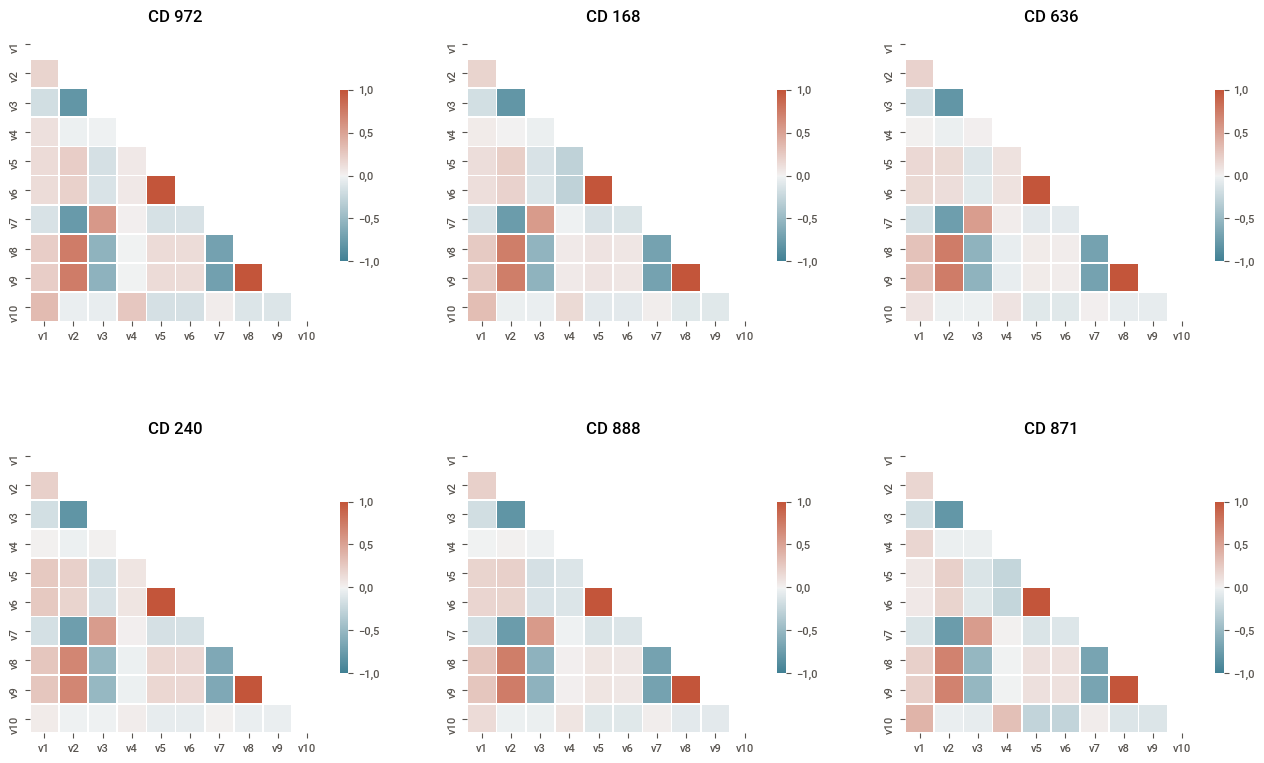

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

eixo = (ax[0,0], ax[0,1], ax[0,2],
        ax[1,0], ax[1,1], ax[1,2])

for i, j in zip(d, eixo):
    print(j)
    x,y,teste = pre_processing(dados[i])
    x = pd.concat([x,y], axis=1)
    x.columns = ['v'+str(i) for i in range(1,11)]
    # Compute the correlation matrix
    corr = x.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    
#     ax = fig.add_subplot()
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, 
                mask=mask, 
                cmap=cmap, 
                vmax=1,
                vmin=-1,
                center=0,
                square=True, 
                linewidths=.5, 
                cbar_kws={"shrink": .5}, 
                ax=j)
    
    j.set_title('CD ' + i[-7:-4])

plt.savefig('heatmap.png',
            dpi = 150,
            bbox_inches='tight',
            pad_inches = 0)

In [31]:
corr[np.abs(corr) > .6]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
v1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2,NaN,1.000000,-0.793717,NaN,NaN,NaN,-0.744421,0.709745,0.710870,NaN
v3,NaN,-0.793717,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
v5,NaN,NaN,NaN,NaN,1.000000,0.997039,NaN,NaN,NaN,NaN
v6,NaN,NaN,NaN,NaN,0.997039,1.000000,NaN,NaN,NaN,NaN
v7,NaN,-0.744421,NaN,NaN,NaN,NaN,1.000000,-0.672808,-0.673340,NaN
v8,NaN,0.709745,NaN,NaN,NaN,NaN,-0.672808,1.000000,0.999998,NaN
v9,NaN,0.710870,NaN,NaN,NaN,NaN,-0.673340,0.999998,1.000000,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
x, y, teste = pre_processing(d)

sns.set_theme(style="white")
x = pd.concat([x,y], axis=1)




AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
x